In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import pmdarima as pm

## pmdarima Requirements

# numpy (1.16.2)
# scipy (1.2.1)
# scikit-learn (0.20.1) 
# pandas (0.23.4
# statsmodels (0.9.0) 
# Cython (0.29.2)
# pmdarima (1.2.1)

In [2]:
# Load the "US_emissions_by_gas_1990-2017_data.xlsx" Dataset

US_gas_data = pd.read_excel("data/US_emissions_by_gas_1990_2017_data.xlsx")
US_gas_data.head()

,Year,Carbon_dioxide,Methane,Nitrous_oxide,Fluorinated_gases,Total
0,1990,5121.179440,779.845550,370.307694,99.667859,6371.000543
1,1991,5071.563914,784.384856,368.961757,90.704668,6315.615194
2,1992,5174.670601,783.176602,371.786442,95.300712,6424.934357
3,1993,5281.386608,770.308404,385.347234,95.027350,6532.069596
4,1994,5375.033803,775.160651,376.511527,98.129806,6624.835787


METHANE AUTO ARIMA MODEL

In [3]:
methane_model = pm.auto_arima(US_gas_data.Methane, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(methane_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=188.896, BIC=193.928, Fit time=0.029 seconds
Fit ARIMA: order=(0, 2, 0); AIC=197.247, BIC=199.763, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=187.478, BIC=191.253, Fit time=0.014 seconds
Fit ARIMA: order=(0, 2, 1); AIC=186.913, BIC=190.687, Fit time=0.042 seconds
Fit ARIMA: order=(0, 2, 2); AIC=189.571, BIC=194.604, Fit time=0.019 seconds
Fit ARIMA: order=(1, 2, 2); AIC=190.878, BIC=197.168, Fit time=0.038 seconds
Total fit time: 0.153 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -90.456
Method:                       css-mle   S.D. of innovations              7.366
Date:                Mon, 05 Aug 2019   AIC                            186.913
Time:                        11:08:34   BIC                            190.687
Sample:                           

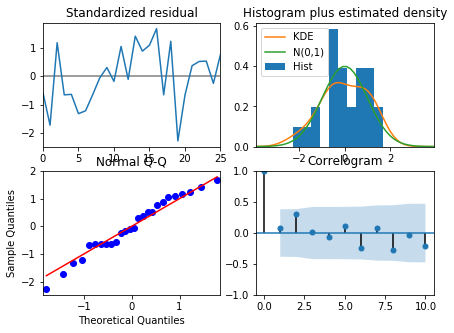

In [4]:
methane_model.plot_diagnostics(figsize=(7,5))
plt.show()

Top left: The residual errors should fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot should have normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


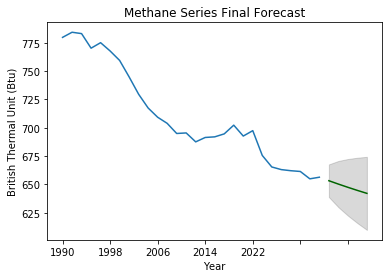

In [5]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Methane Series ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = methane_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data.Methane), len(US_gas_data.Methane)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Methane Plot
plt.plot(US_gas_data.Methane)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Methane Series Final Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

NITROUS OXIDE AUTO ARIMA MODEL

In [6]:
Nitrous_oxide_model = pm.auto_arima(US_gas_data.Nitrous_oxide, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Nitrous_oxide_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=238.085, BIC=240.601, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=227.698, BIC=231.472, Fit time=0.019 seconds
Fit ARIMA: order=(0, 2, 1); AIC=215.572, BIC=219.346, Fit time=0.016 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.069 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -104.786
Method:                       css-mle   S.D. of innovations             12.780
Date:                Mon, 05 Aug 2019   AIC                            215.572
Time:                        11:08:40   BIC                            219.346
Sample:                             2   HQIC                    

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


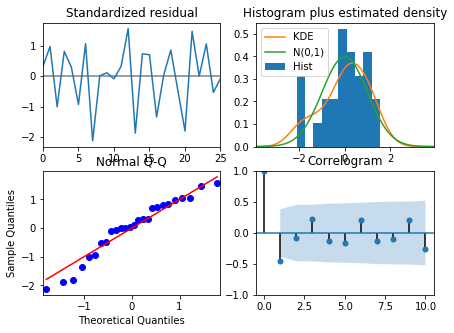

In [7]:
Nitrous_oxide_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


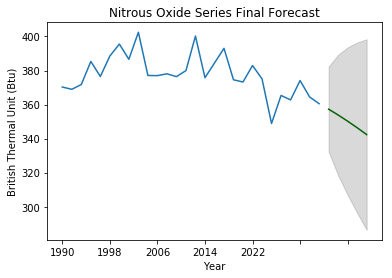

In [8]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Nitrous Oxide Series ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = Nitrous_oxide_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data.Nitrous_oxide), len(US_gas_data.Nitrous_oxide)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Nitrous Oxide Plot
plt.plot(US_gas_data.Nitrous_oxide)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Nitrous Oxide Series Final Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

FLUORINATED GASES AUTO ARIMA MODEL

In [9]:
Fluorinated_gases_model = pm.auto_arima(US_gas_data.Fluorinated_gases, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Fluorinated_gases_model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=203.957, BIC=209.286, Fit time=0.063 seconds
Fit ARIMA: order=(0, 0, 0); AIC=260.841, BIC=263.505, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=202.149, BIC=206.145, Fit time=0.029 seconds
Fit ARIMA: order=(0, 0, 1); AIC=238.434, BIC=242.431, Fit time=0.018 seconds
Fit ARIMA: order=(2, 0, 0); AIC=203.822, BIC=209.150, Fit time=0.032 seconds
Fit ARIMA: order=(2, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.154 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   28
Model:                     ARMA(1, 0)   Log Likelihood                 -98.074
Method:                       css-mle   S.D. of innovations              7.652
Date:                Mon, 05 Aug 2019   AIC                            202.149
Time:                        11:08:45   BIC                            206.145
Sample:                             0   HQIC

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


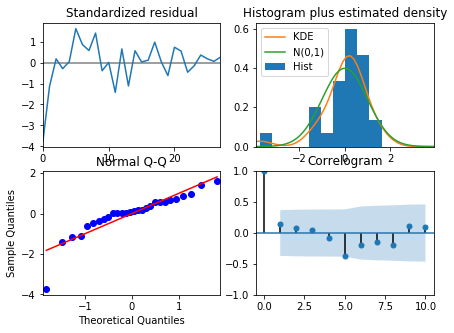

In [10]:
Fluorinated_gases_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


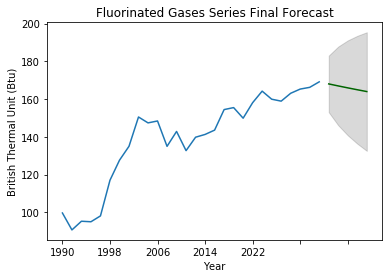

In [11]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Fluorinated Gases Series ARIMA(1, 0, 0) Model Forecast
n_periods = 5
fc, confint = Fluorinated_gases_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data.Fluorinated_gases), len(US_gas_data.Fluorinated_gases)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Fluorinated_gases Plot
plt.plot(US_gas_data.Fluorinated_gases)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Fluorinated Gases Series Final Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

CARBON DIOXIDE AUTO ARIMA MODEL

In [12]:
Carbon_dioxide_model = pm.auto_arima(US_gas_data.Carbon_dioxide, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Carbon_dioxide_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=338.346, BIC=343.379, Fit time=0.054 seconds
Fit ARIMA: order=(0, 2, 0); AIC=353.352, BIC=355.868, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=350.045, BIC=353.820, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 1); AIC=336.953, BIC=340.727, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.122 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -165.476
Method:                       css-mle   S.D. of innovations            131.922
Date:                Mon, 05 Aug 2019   AIC                            336.953
Time:                        11:08:51   BIC                            340.727
Sample:                             2   HQIC          

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


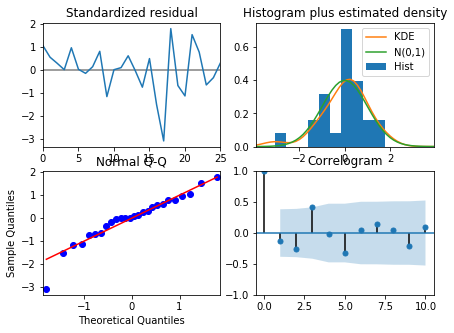

In [13]:
Carbon_dioxide_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


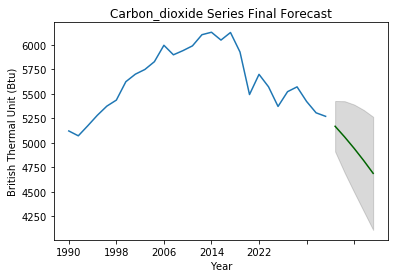

In [14]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Carbon_dioxide Series  ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = Carbon_dioxide_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data.Carbon_dioxide), len(US_gas_data.Carbon_dioxide)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Carbon dioxide Plot
plt.plot(US_gas_data.Carbon_dioxide)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Carbon_dioxide Series Final Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

CARBON DIOXIDE UPTREND (1990-2005) AUTO ARIMA MODEL

In [15]:
Carbon_dioxide_up_model = pm.auto_arima(US_gas_data[:16].Carbon_dioxide, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Carbon_dioxide_up_model[:16].summary())

Fit ARIMA: order=(1, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=174.927, BIC=176.205, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=172.846, BIC=174.763, Fit time=0.026 seconds
Fit ARIMA: order=(0, 2, 1); AIC=168.466, BIC=170.383, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.085 seconds


TypeError: 'ARIMA' object is not subscriptable

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


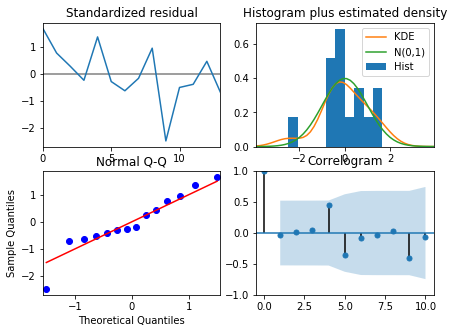

In [16]:
Carbon_dioxide_up_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


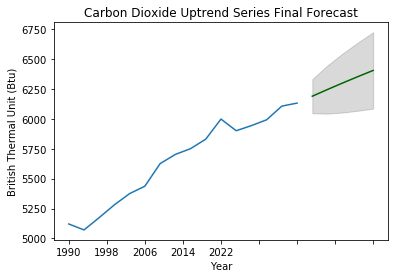

In [17]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Carbon Dioxide Uptrend Series  ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = Carbon_dioxide_up_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data[:16].Carbon_dioxide), len(US_gas_data[:16].Carbon_dioxide)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Carbon Dioxide Uptrend Plot
plt.plot(US_gas_data[:16].Carbon_dioxide)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Carbon Dioxide Uptrend Series Final Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()

CARBON DIOXIDE DOWNTREND (2004-2017) AUTO ARIMA MODEL

In [18]:
Carbon_dioxide_down_model = pm.auto_arima(US_gas_data[15:].Carbon_dioxide, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Carbon_dioxide_down_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=154.929, BIC=156.521, Fit time=0.046 seconds
Fit ARIMA: order=(0, 2, 0); AIC=159.229, BIC=160.025, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=159.190, BIC=160.384, Fit time=0.035 seconds
Fit ARIMA: order=(0, 2, 1); AIC=153.376, BIC=154.570, Fit time=0.014 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.111 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   11
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 -73.688
Method:                       css-mle   S.D. of innovations            175.390
Date:                Mon, 05 Aug 2019   AIC                            153.376
Time:                        11:09:08   BIC                            154.570
Sample:                             2   HQIC          

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


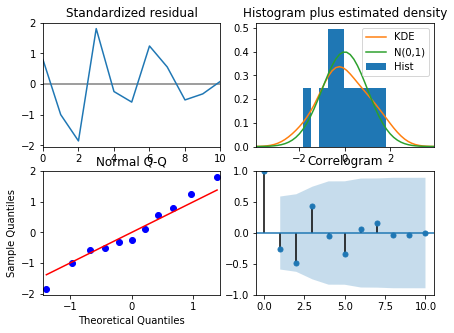

In [19]:
Carbon_dioxide_down_model.plot_diagnostics(figsize=(7,5))
plt.show()

/Users/annieylai/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


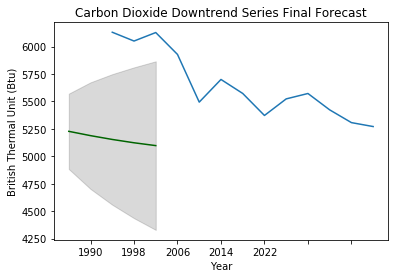

In [20]:
matplotlib.use("agg")
fig = plt.figure()
ax = fig.gca()

# Carbon Dioxide Downtrend Series ARIMA(0, 2, 1) Model Forecast
n_periods = 5
fc, confint = Carbon_dioxide_down_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_data[15:].Carbon_dioxide), len(US_gas_data[15:].Carbon_dioxide)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Carbon Dioxide Downtrend Plot
plt.plot(US_gas_data[15:].Carbon_dioxide)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Carbon Dioxide Downtrend Series Final Forecast")
plt.xlabel("Year")
plt.ylabel("British Thermal Unit (Btu)")

x_formatter = FixedFormatter(["0", "1990", "1998", "2006", "2014", "2022"])
x_locator = FixedLocator([0, 8, 16, 24, 32, 40])
ax.xaxis.set_major_formatter(x_formatter)

plt.show()